# Visualizing Chipotle's Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# set this so the graphs open internally
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv).

### Step 3. Assign it to a variable called chipo.

In [6]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep='\t')

### Step 4. See the first 10 entries

In [7]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. Create a histogram of the top 5 items bought

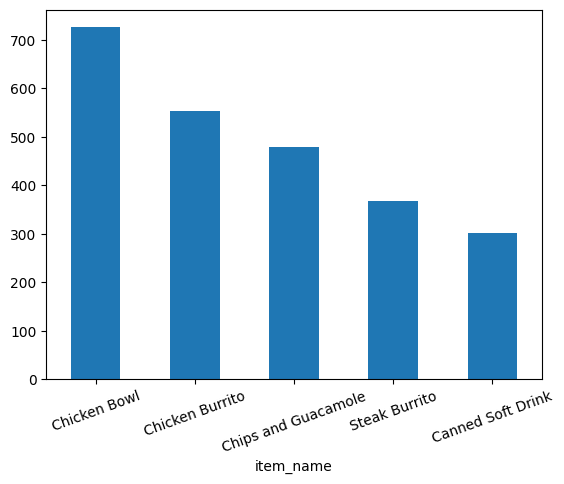

In [11]:
topItems = chipo['item_name'].value_counts()[:5]
topItems.plot(kind='bar')
plt.xticks(rotation=20)
plt.show()

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

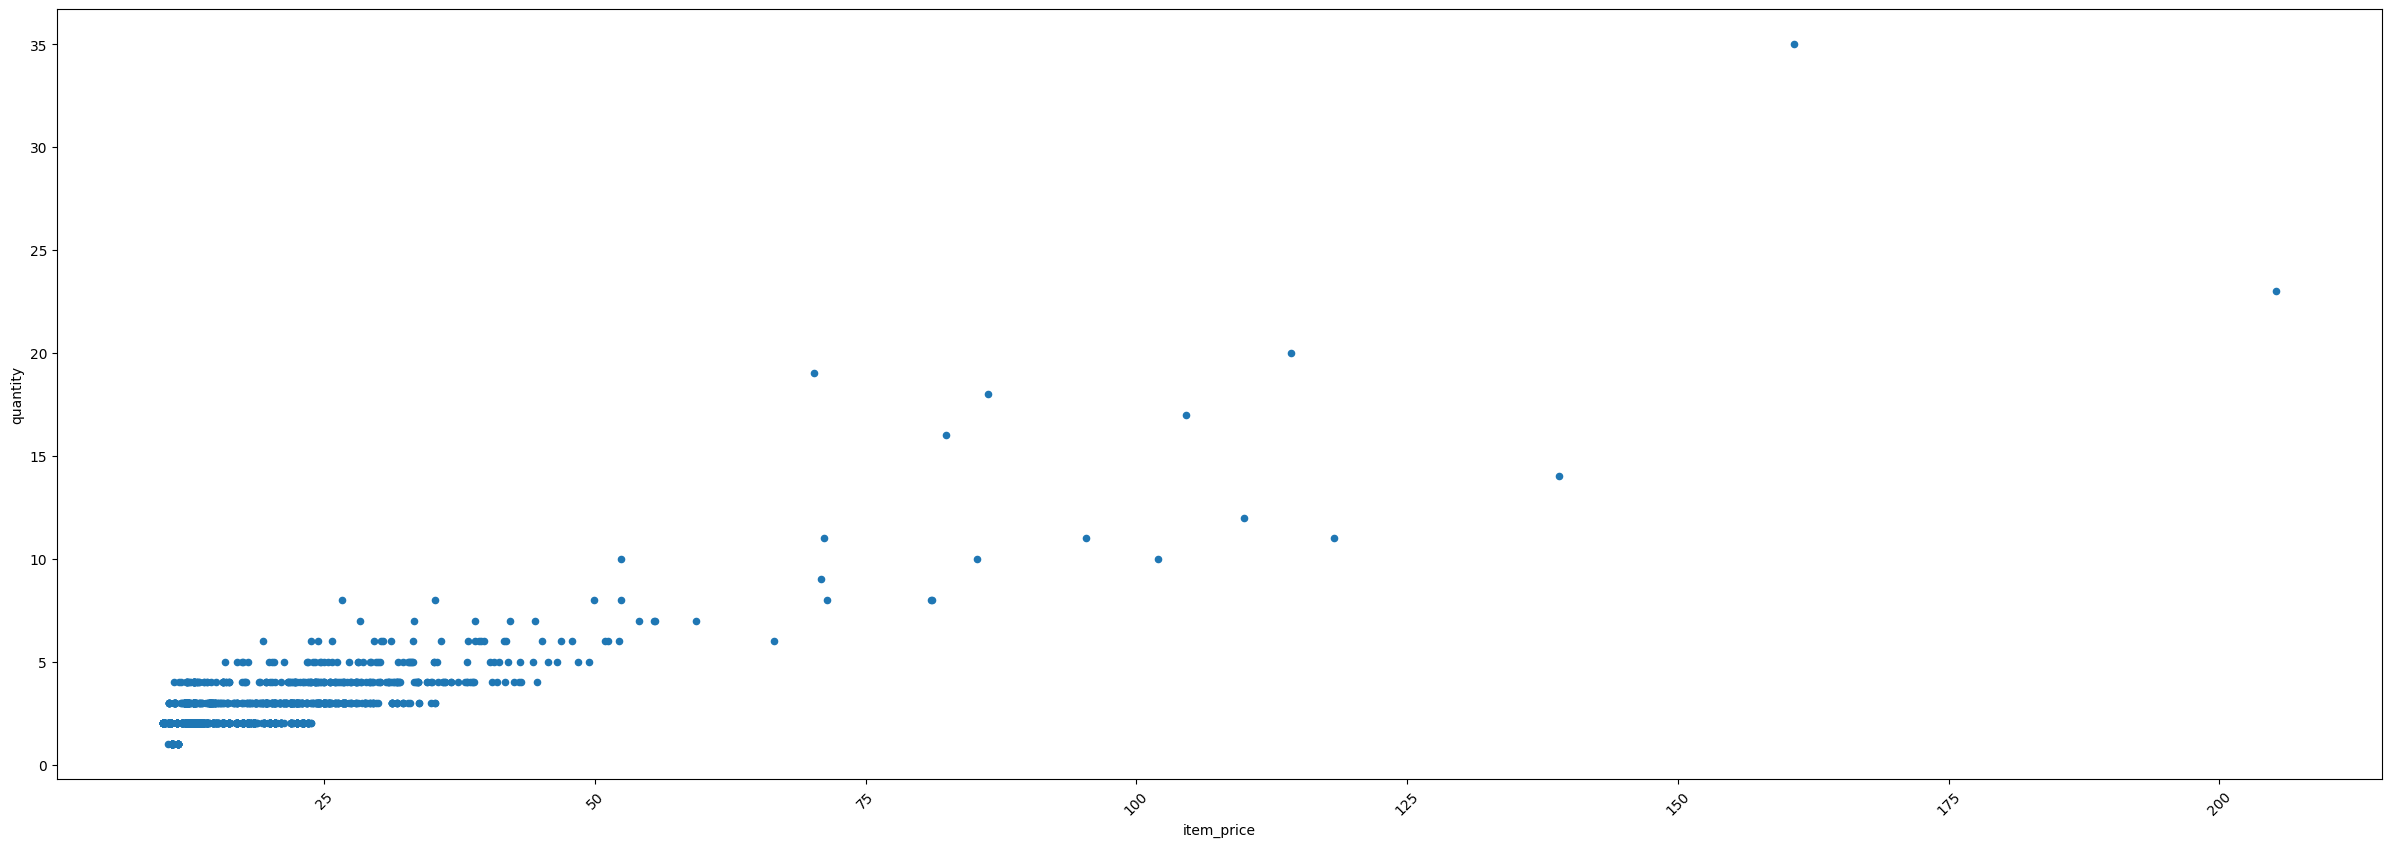

In [38]:
chipo['item_price'].apply(lambda x: float(x))
scatterData = chipo.groupby('order_id').sum()
scatterData.plot(kind='scatter', y='quantity', x='item_price', figsize=(30, 10))
plt.xticks(rotation=45)
plt.show()

### Step 7. BONUS: Create a question and a graph to answer your own question.

In [48]:
# chipo.drop('choice_description', axis=1, inplace=True)
chipo.head(20)

,order_id,quantity,item_name,item_price
0,1,1,Chips and Fresh Tomato Salsa,2.39
1,1,1,Izze,3.39
2,1,1,Nantucket Nectar,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,2.39
4,2,2,Chicken Bowl,16.98
5,3,1,Chicken Bowl,10.98
6,3,1,Side of Chips,1.69
7,4,1,Steak Burrito,11.75
8,4,1,Steak Soft Tacos,9.25
9,5,1,Steak Burrito,9.25


In [68]:
chickenData = chipo[chipo['item_name'].str.contains('Chicken', case=False, na=False)]
chickenData = chickenData.groupby("item_name").sum()
chickenData.drop('order_id', axis=1, inplace=True)
chickenData['ratio'] = chickenData['quantity'] / chickenData['item_price']
chickenData = chickenData.reset_index()
chickenData.head(10)

,item_name,quantity,item_price,ratio
0,Chicken Bowl,761,7342.73,0.103640
1,Chicken Burrito,591,5575.82,0.105993
2,Chicken Crispy Tacos,50,472.13,0.105903
3,Chicken Salad,9,81.09,0.110988
4,Chicken Salad Bowl,123,1228.75,0.100102
5,Chicken Soft Tacos,120,1108.09,0.108294


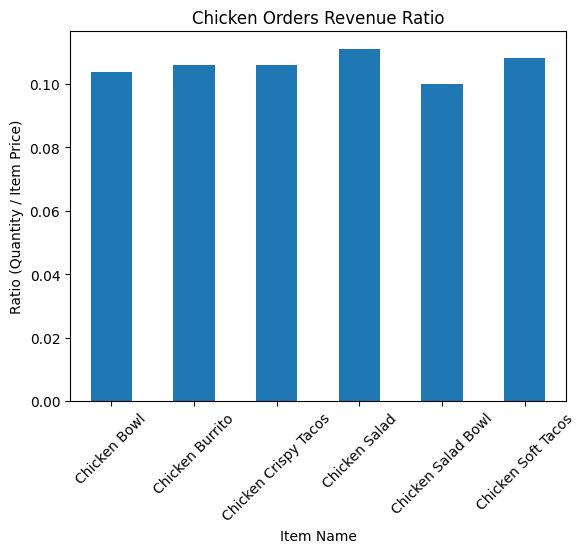

In [72]:
chickenData.plot(kind='bar',y='ratio', x='item_name', legend=False)
plt.xticks(rotation=45)
plt.title('Chicken Orders Revenue Ratio')
plt.xlabel('Item Name')
plt.ylabel('Ratio (Quantity / Item Price)')
plt.show()